In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [3]:
data_location='Penjualan Mobil Bekas Kendari.xlsx'
row_data = pd.read_excel(data_location)
row_data.shape

(160, 12)

In [4]:
row_data.isna().sum()

no               0
model            0
tahun            0
harga            0
transmisi        0
jarak_tempuh     0
bahan_bakar      0
pajak            0
mpg              0
ukuran_mesin     0
harga_awal       0
selisih_tahun    0
dtype: int64

In [5]:
row_data.describe()

,no,tahun,harga,jarak_tempuh,pajak,mpg,ukuran_mesin,harga_awal,selisih_tahun
count,160.000000,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,160.000000,160.000000,1.600000e+02,160.000000
mean,80.500000,2015.075000,1.772546e+08,1.195561e+05,2.610075e+06,25.275000,1.465625,2.145706e+08,7.925000
std,46.332134,5.263557,1.838520e+08,3.964340e+05,1.288941e+06,4.164767,0.412089,2.346354e+08,5.263557
min,1.000000,1970.000000,3.200000e+07,1.020000e+03,1.450000e+05,20.000000,1.000000,7.450000e+07,0.000000
25%,40.750000,2013.000000,1.090000e+08,3.038400e+04,2.000000e+06,22.000000,1.200000,1.200000e+08,5.000000
50%,80.500000,2016.000000,1.350000e+08,7.029000e+04,2.475000e+06,25.000000,1.300000,1.450000e+08,7.000000
75%,120.250000,2018.000000,1.897250e+08,1.120000e+05,3.200000e+06,25.000000,1.500000,2.290000e+08,10.000000
max,160.000000,2023.000000,2.147484e+09,5.000000e+06,9.431000e+06,42.000000,3.000000,2.300000e+09,53.000000


In [6]:
row_data.head(10)

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin,harga_awal,selisih_tahun
0,1,Mitsubishi,1970,290000000,Manual,27499,Petrol/Gasoline/Bensin,1800000,28,1.8,2300000000,53
1,2,Honda civic type R,2022,400000000,Manual,20000,Diesel/Solar,150000,25,1.2,515000000,1
2,3,Toyota Innova V,2017,370000000,Manual,5000000,Petrol/Gasoline/Bensin,2000000,28,1.8,150000000,6
3,4,Toyota Agya,2020,136000000,Manual,24089,Petrol/Gasoline/Bensin,1725250,20,1.0,79500000,3
4,5,Toyota Agya,2017,200000000,Manual,19400,Petrol/Gasoline/Bensin,1200000,22,1.2,143600000,6
5,6,Toyota Rush,2022,280000000,Manual,30063,Petrol/Gasoline/Bensin,145000,28,1.8,218500000,1
6,7,Daihatsu Ayla,2014,117000000,Manual,68000,Petrol/Gasoline/Bensin,1000000,22,1.0,74500000,9
7,8,Mitsubishi Mirage,2012,173000000,Automatic,150000,Petrol/Gasoline/Bensin,2400000,20,1.2,129500000,11
8,9,Toyota Avanza G,2010,180000000,Manual,20810,Petrol/Gasoline/Bensin,200000,26,1.6,89500000,13
9,10,Toyota Inova,2012,200000000,Manual,12000,Petrol/Gasoline/Bensin,1300000,33,2.3,343100000,11


In [7]:
print(row_data.dtypes)

no                 int64
model             object
tahun              int64
harga              int64
transmisi         object
jarak_tempuh       int64
bahan_bakar       object
pajak              int64
mpg                int64
ukuran_mesin     float64
harga_awal         int64
selisih_tahun      int64
dtype: object


Text(0.5, 0.98, 'Hubungan tiap variabel numerik dengan target')

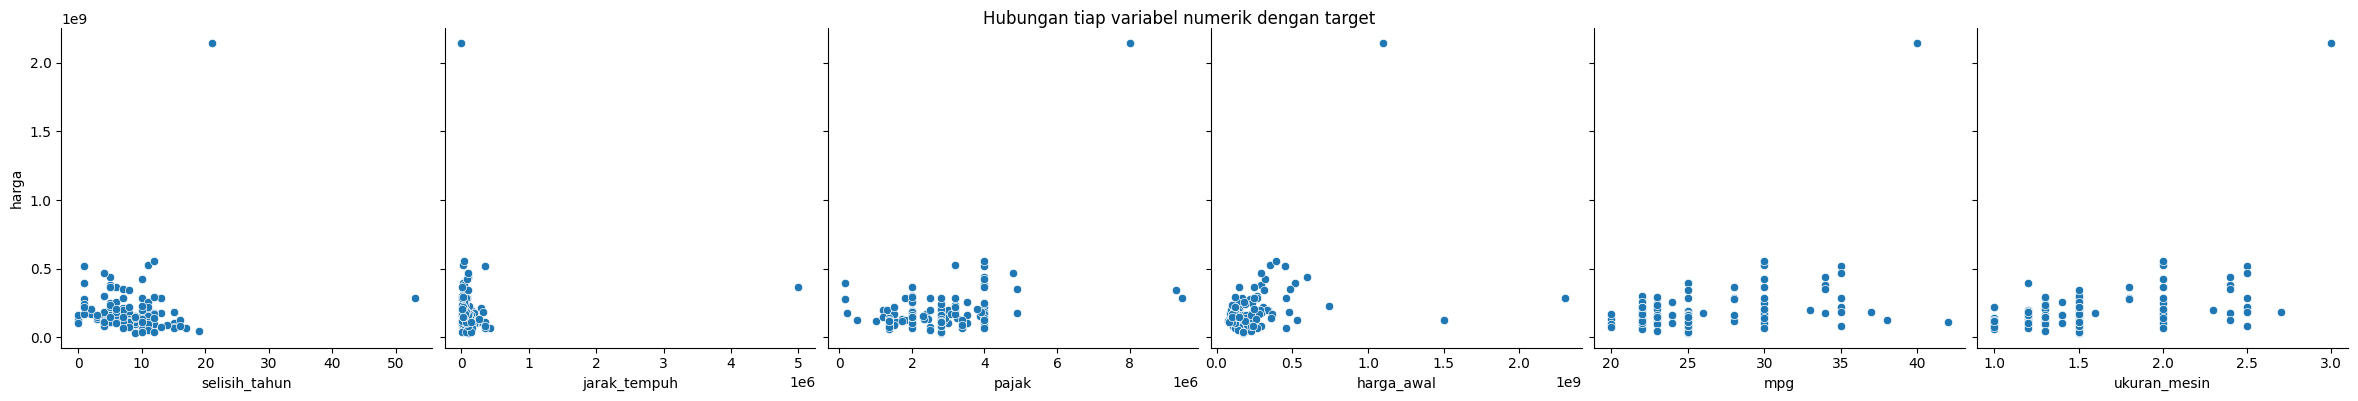

In [8]:
numeric_data = ['selisih_tahun', 'jarak_tempuh', 'pajak', 'harga_awal', 'mpg', 'ukuran_mesin']

sns.pairplot(x_vars = numeric_data, y_vars = 'harga', data = row_data, height = 4, aspect = 1) 
plt.suptitle("Hubungan tiap variabel numerik dengan target")

In [9]:
data = row_data[['selisih_tahun', 'jarak_tempuh', 'pajak', 'harga_awal', 'mpg', 'ukuran_mesin', 'harga']]

fig = data.corr()
fig.style.background_gradient(cmap='coolwarm')

,selisih_tahun,jarak_tempuh,pajak,harga_awal,mpg,ukuran_mesin,harga
selisih_tahun,1.000000,0.009443,0.239729,0.587145,0.211819,0.286441,0.125753
jarak_tempuh,0.009443,1.000000,-0.010743,-0.024293,0.063491,0.086416,0.052622
pajak,0.239729,-0.010743,1.000000,0.227366,0.537226,0.675595,0.450434
harga_awal,0.587145,-0.024293,0.227366,1.000000,0.356070,0.422433,0.406037
mpg,0.211819,0.063491,0.537226,0.356070,1.000000,0.838130,0.443893
ukuran_mesin,0.286441,0.086416,0.675595,0.422433,0.838130,1.000000,0.511235
harga,0.125753,0.052622,0.450434,0.406037,0.443893,0.511235,1.000000


In [10]:
features = ['selisih_tahun', 'pajak', 'harga_awal', 'mpg', 'ukuran_mesin']
x = data[features]
y = data['harga']
x.shape, y.shape

((160, 5), (160,))

In [11]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state = 80)

train_x.shape, test_x.shape

((120, 5), (40, 5))

In [34]:
def regression_model(model):
    regressor = model
    regressor.fit(train_x, train_y)
    score = regressor.score(test_x, test_y)
    return regressor, score

model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance._append({"Model": model, "Score": score}, ignore_index=True)

model_performance

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36336\781680979.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance = model_performance._append({"Model": model, "Score": score}, ignore_index=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.66705e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing re

,Model,Score
0,LinearRegression(),0.199555
1,Ridge(),0.207880
2,Lasso(),0.199555
3,"(DecisionTreeRegressor(max_features=1.0, rando...",0.502113


In [35]:
model = RandomForestRegressor()

model.fit(train_x, train_y)
predictions = model.predict(test_x)

In [36]:
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 4153176363207245.0
R-squared (R2): 0.5111191062917246


In [38]:
features = ['selisih_tahun', 'pajak', 'harga_awal', 'mpg', 'ukuran_mesin']

def predict_price(model, features):
    predicted_price = model.predict([features])
    return predicted_price[0]

input_features = np.array([10, 150000, 315000000, 22, 1.6])

predicted_price = predict_price(model, input_features)

print(f"Prediksi harga mobil: Rp {predicted_price:.2f}\n\n")



Prediksi harga mobil: Rp 249677590.00




c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
